In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Default plotting settings for matplotlib
plt.rc('figure', figsize=(8, 6), dpi=100)

# Datasets

## `hexagon`

In [3]:
hexagon = pd.read_csv('data/hexagon.csv')

In [4]:
hexagon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       600 non-null    float64
 1   y       600 non-null    float64
 2   c       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [5]:
hexagon.describe()

,x,y,c
count,600.000000,600.000000,600.00000
mean,0.006708,-0.056915,2.50000
std,2.254771,4.377301,1.70925
min,-4.561541,-8.632626,0.00000
25%,-2.031596,-3.612048,1.00000
50%,-0.017880,-0.815813,2.50000
75%,2.153962,3.580985,4.00000
max,4.727185,8.188139,5.00000


In [6]:
hexagon['c'].value_counts()

1    100
0    100
2    100
4    100
3    100
5    100
Name: c, dtype: int64

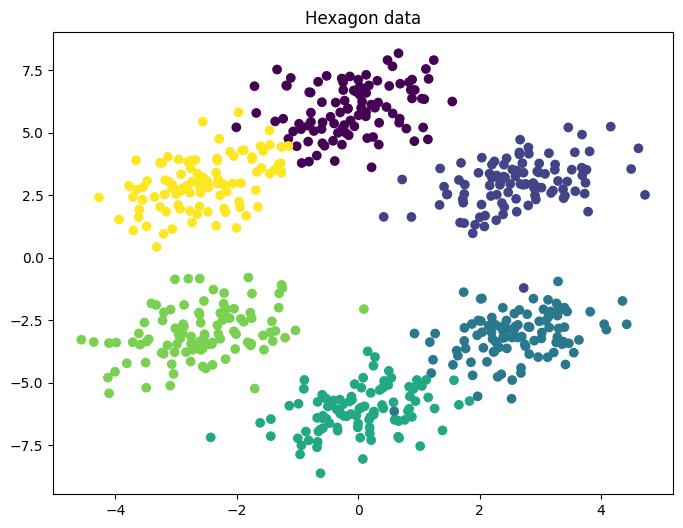

In [7]:
plt.scatter(x='x', y='y', data=hexagon, c='c')
plt.title('Hexagon data')
plt.show()

In [8]:
hex_xy = hexagon[['x', 'y']].to_numpy().reshape((-1, 2))

## `cube`

In [9]:
cube = pd.read_csv('data/cube.csv')

In [10]:
cube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1200 non-null   float64
 1   y       1200 non-null   float64
 2   z       1200 non-null   float64
 3   c       1200 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 37.6 KB


In [11]:
cube.describe()

,x,y,z,c
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,1.482818,2.016366,1.007087,3.500000
std,1.601430,2.128296,1.132364,2.292243
min,-1.986048,-2.262178,-1.619699,0.000000
25%,-0.031297,-0.000977,-0.000701,1.750000
50%,1.414436,1.917702,0.965217,3.500000
75%,2.978607,4.055595,2.010555,5.250000
max,4.996167,6.078151,3.621737,7.000000


In [12]:
cube['c'].value_counts()

0    150
1    150
2    150
3    150
4    150
5    150
6    150
7    150
Name: c, dtype: int64

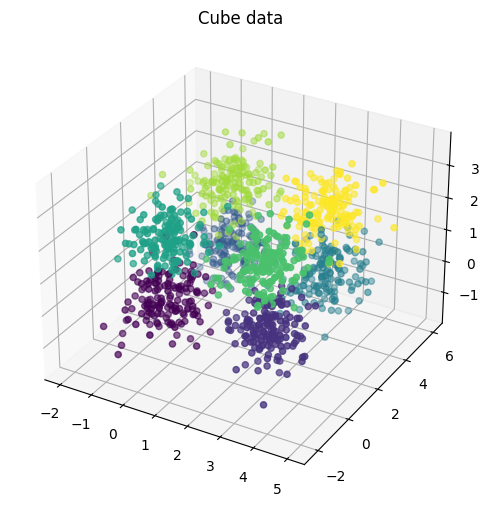

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter('x', 'y', 'z', data=cube, c='c')
plt.title('Cube data')
plt.show()

In [14]:
cube_xyz = cube[['x', 'y', 'z']].to_numpy().reshape((-1, 3))

# Kohonen network testing

In [15]:
from kohonenn.network import KohonenNetwork
from kohonenn.neighbourhood_func import GaussFunction, MexicanHat
from kohonenn.lr_decay_functions import alpha_func

## `hexagon`

### Gaussian neighbourhood function

In [16]:
koh_hex_gauss = KohonenNetwork(
    input_size=2, output_dim=(3, 2),
)

In [18]:
koh_hex_gauss.train(
    data=hex_xy, epochs=1000, init_lr=1, lr_decay_func=alpha_func, 
    neighbourhood_func=GaussFunction(nbhood_width_factor=0.1),
    verbosity_period=50, random_state=3,
)

Epoch 50 done!
   - mean abs delta = 0.009860329411295849
   - max abs delta = 0.2695308860768173
Epoch 100 done!
   - mean abs delta = 0.008359640802498325
   - max abs delta = 0.2519090180621228
Epoch 150 done!
   - mean abs delta = 0.00805320045394214
   - max abs delta = 0.24091783376282838
Epoch 200 done!
   - mean abs delta = 0.007479447092001922
   - max abs delta = 0.20704635889550124
Epoch 250 done!
   - mean abs delta = 0.006993822102037167
   - max abs delta = 0.21333699342088167
Epoch 300 done!
   - mean abs delta = 0.006709524745444137
   - max abs delta = 0.18511119925541586
Epoch 350 done!
   - mean abs delta = 0.006027968868625048
   - max abs delta = 0.18673507076970694
Epoch 400 done!
   - mean abs delta = 0.00573359354671306
   - max abs delta = 0.15630736073388735
Epoch 450 done!
   - mean abs delta = 0.005122420458980694
   - max abs delta = 0.12587457411900954
Epoch 500 done!
   - mean abs delta = 0.005111452374583063
   - max abs delta = 0.1305909158118328
Epoch 

In [19]:
pred = koh_hex_gauss.predict(hex_xy)

In [22]:
pred

array([1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1,
       1, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 5, 1, 1, 5, 5, 5,
       5, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1,
       5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 1, 1,
       5, 5, 2, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 5, 5, 1,
       1, 1, 5, 1, 5, 5, 1, 1, 1, 5, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1, 5, 5, 1, 1, 1, 1, 5, 5, 1,
       1, 5, 5, 5, 5, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1,
       5, 1, 1, 1, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1,
       5, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1, 5, 1, 1, 1, 1,
       1, 1, 5, 1, 1, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1,
       1, 5, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 5,
       1, 5, 1, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1, 1, 5,

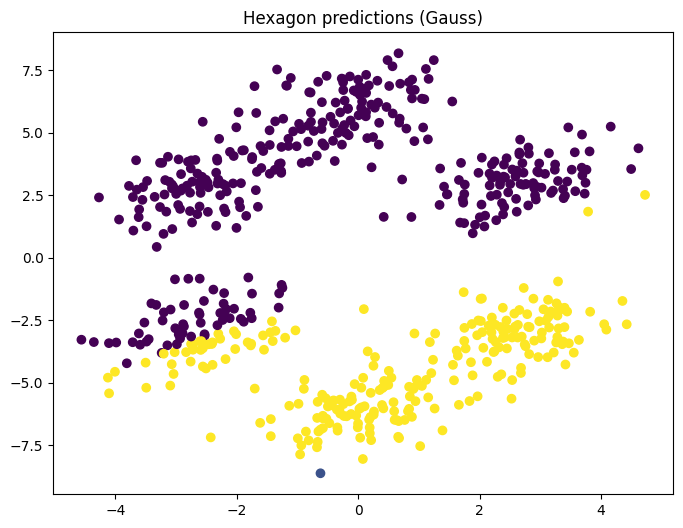

In [20]:
plt.scatter(x='x', y='y', data=hexagon, c=pred)
plt.title('Hexagon predictions (Gauss)')
plt.show()

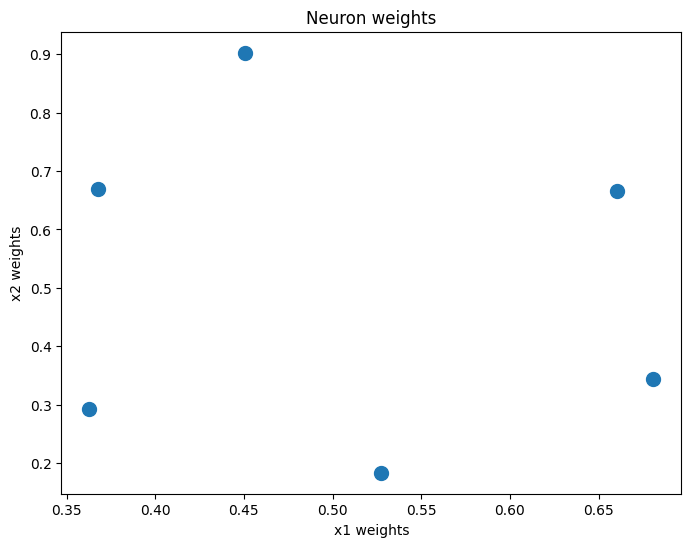

In [21]:
koh_hex_gauss.visualise_weights(size=100)
plt.show()

### Mexican hat neighbourhood function

In [ ]:
koh_hex_mex = KohonenNetwork(
    input_size=2, output_dim=(3, 2),
)

In [ ]:
koh_hex_mex.train(
    data=hex_xy, epochs=100, init_lr=1, lr_decay_func=alpha_func, 
    neighbourhood_func=MexicanHat(nbhood_width_factor=0.1),
    verbosity_period=10, random_state=33,
)

TypeError: KohonenNetwork.train() missing 1 required positional argument: 'init_lr'

In [ ]:
pred = koh_hex_mex.predict(hex_xy)

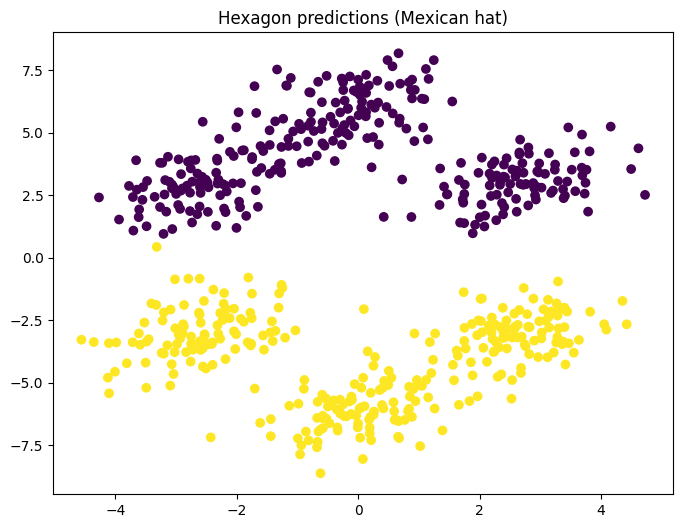

In [ ]:
plt.scatter(x='x', y='y', data=hexagon, c=pred)
plt.title('Hexagon predictions (Mexican hat)')
plt.show()

## `cube`

### Gaussian neighbourhood function

In [ ]:
koh_cube_gauss = KohonenNetwork(
    input_size=3, output_dim=(4, 2),
)

In [ ]:
koh_cube_gauss.train(
    data=cube_xyz, epochs=100, init_lr=1, lr_decay_func=alpha_func, 
    neighbourhood_func=GaussFunction(nbhood_width_factor=0.1),
    verbosity_period=10, random_state=28,
)

Epoch 10 done!
   - mean abs delta = 0.2657489543747126
   - max abs delta = 3.4263253958645388
Epoch 20 done!
   - mean abs delta = 0.06939769581547327
   - max abs delta = 2.3878396430707047
Epoch 30 done!
   - mean abs delta = 0.056047848428755424
   - max abs delta = 2.265541789919998
Epoch 40 done!
   - mean abs delta = 0.04778260482646012
   - max abs delta = 2.2734661577394237
Epoch 50 done!
   - mean abs delta = 0.043555311167543194
   - max abs delta = 1.895869170620434
Epoch 60 done!
   - mean abs delta = 0.03777014423309656
   - max abs delta = 1.3992289387847676
Epoch 70 done!
   - mean abs delta = 0.03330076485720364
   - max abs delta = 1.5233282566269946
Epoch 80 done!
   - mean abs delta = 0.029345421714763082
   - max abs delta = 1.0689042397960533
Epoch 90 done!
   - mean abs delta = 0.026162278332284856
   - max abs delta = 1.029867694733431
Epoch 100 done!
   - mean abs delta = 0.023484216035178754
   - max abs delta = 0.9188233713078723


In [ ]:
pred = koh_cube_gauss.predict(cube_xyz)

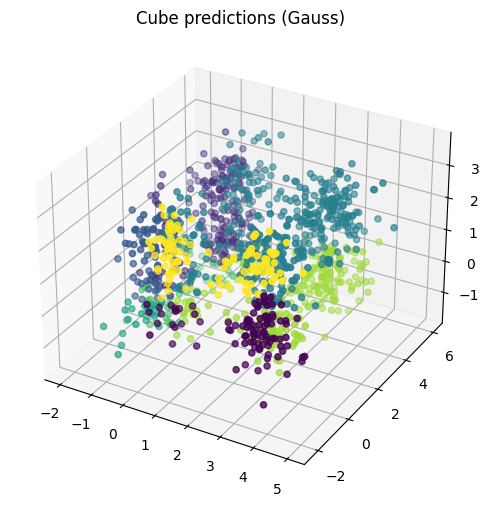

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter('x', 'y', 'z', data=cube, c=pred)
plt.title('Cube predictions (Gauss)')
plt.show()

### Mexican hat neighbourhood function

In [ ]:
koh_cube_mex = KohonenNetwork(
    input_size=3, output_dim=(4, 2),
)

In [ ]:
koh_cube_mex.train(
    data=cube_xyz, epochs=100, init_lr=1, lr_decay_func=alpha_func, 
    neighbourhood_func=MexicanHat(nbhood_width_factor=0.1),
    verbosity_period=10, random_state=26,
)

Epoch 10 done!
   - mean abs delta = 4.781951837667396
   - max abs delta = 24.104692123545682
Epoch 20 done!
   - mean abs delta = 3.780324231240895
   - max abs delta = 16.912354627559214
Epoch 30 done!
   - mean abs delta = 2.9553897328354357
   - max abs delta = 12.52172333282457
Epoch 40 done!
   - mean abs delta = 2.485446465554638
   - max abs delta = 10.336088771380542
Epoch 50 done!
   - mean abs delta = 2.1124975087682825
   - max abs delta = 8.171332422002655
Epoch 60 done!
   - mean abs delta = 1.7924632571817265
   - max abs delta = 7.238963248199316
Epoch 70 done!
   - mean abs delta = 1.562055899795265
   - max abs delta = 6.795780789332075
Epoch 80 done!
   - mean abs delta = 1.386617729974093
   - max abs delta = 5.292337573094652
Epoch 90 done!
   - mean abs delta = 1.2052123208431345
   - max abs delta = 4.972629895040349
Epoch 100 done!
   - mean abs delta = 1.073181077859783
   - max abs delta = 4.284371017789649


In [ ]:
pred = koh_cube_mex.predict(cube_xyz)

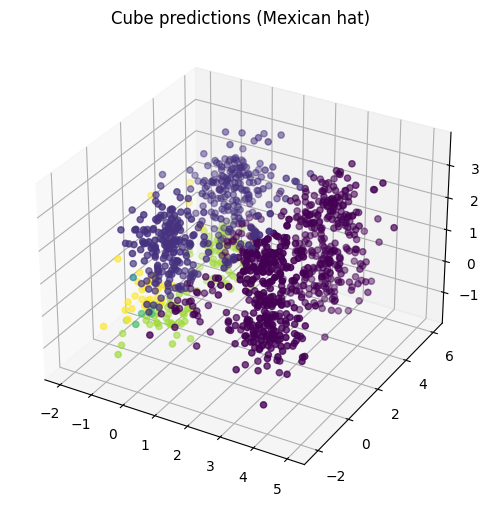

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter('x', 'y', 'z', data=cube, c=pred)
plt.title('Cube predictions (Mexican hat)')
plt.show()